<style>
    h1 {
        text-align: center;
    }
</style>
<font face="Times New Roman">

<h1>5.2.14 - A project about random systems</h1>

<div style="text-align: center">Speaker: Yichen Lu</div>

<font face="Times New Roman">

### Classification of Linear Systems

For a linear system 
$$
\begin{aligned}
	\dot{\mathbf{x}}&=A\mathbf{x}\\
	\left( \begin{array}{c}
	\dot{x}\\
	\dot{y}\\
\end{array} \right) &=\left( \begin{matrix}
	a&		b\\
	c&		d\\
\end{matrix} \right) \left( \begin{array}{c}
	x\\
	y\\
\end{array} \right)\\
\end{aligned}
$$



Notice that $\dot{\mathbf{x}}=0$ when $\mathbf{x}=0$, so the origin is always a fixed point.
<!-- 假设A的特征是lambda_1和lambda_2 -->
Special straight-line trajectories: a trajectory starting on one of the coordinate axes stayed on that axis forever, and exhibited simple exponential growth or decay along it. For the general case, we would like to find the analog of these straight-line trajectories. That is, we seek trajectories of the form
$$
x(t)=e^{\lambda t}\boldsymbol{v}\\
$$
where $\boldsymbol{v}\ne 0$ is some fixed vector to be determine, and M is a growth rate, also to be determined. 

$$
A\boldsymbol{v}=\lambda \boldsymbol{v}
$$

Suppose the eigenvalues of $A$ are $\lambda_1$ and $\lambda_2$.
Then
$$
\lambda^2 - \tau \lambda + \Delta = 0
$$
where
$$
\tau = \lambda_1 + \lambda_2 = \mathrm{tr}(A) = a + d\\
\Delta = \lambda_1\lambda_2 = \det(A) = ad - bc
$$


* Saddle points: $\lambda_1\lambda_2<0$

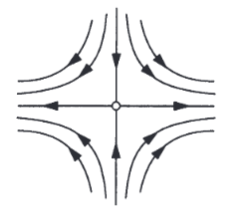

* Non-isolated fixed points: $\lambda_1\lambda_2=0$

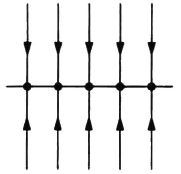

* Centers: $\lambda_1\lambda_2>0$

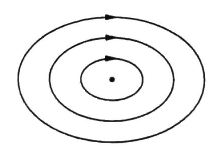

* Stable spiral: $\lambda_1\lambda_2>0$, $\tau^2-4\Delta<0$ and $\tau<0$

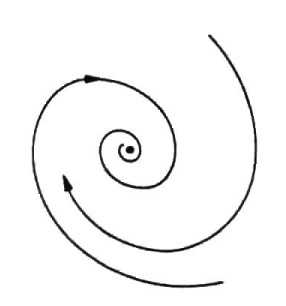

* Unstable spiral: $\lambda_1\lambda_2>0$, $\tau^2-4\Delta<0$ and $\tau>0$

* Stable node: $\lambda_1\lambda_2>0$, $\tau^2-4\Delta>0$ and $\tau<0$

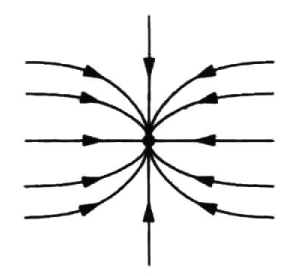

* Unstable node: $\lambda_1\lambda_2>0$, $\tau^2-4\Delta>0$ and $\tau>0$

* Stars, degenerate nodes: $\lambda_1\lambda_2>0$, $\tau=0$

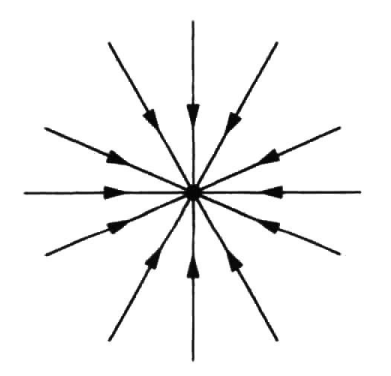

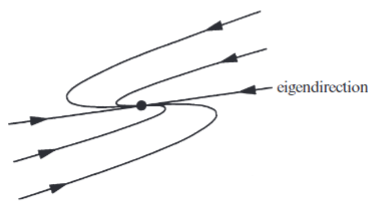
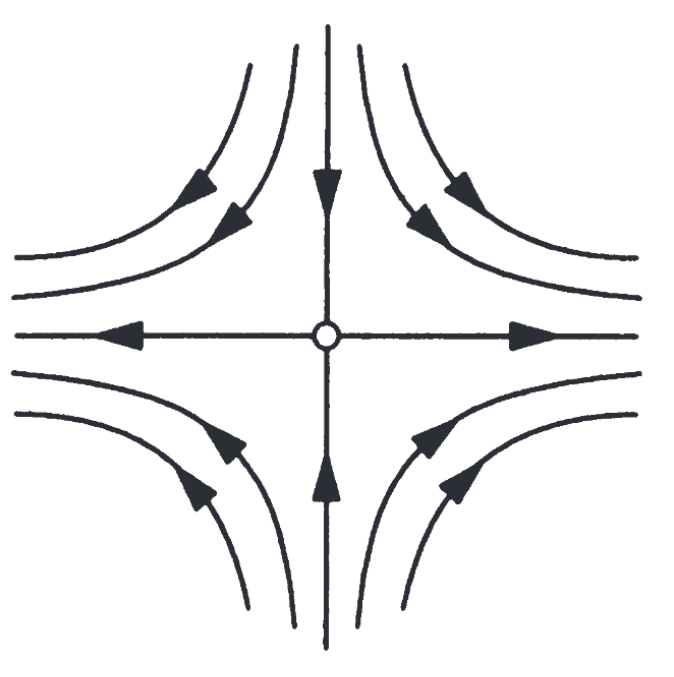
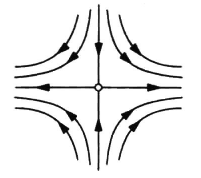

<font face="Times New Roman">

### Classification of Fixed Points

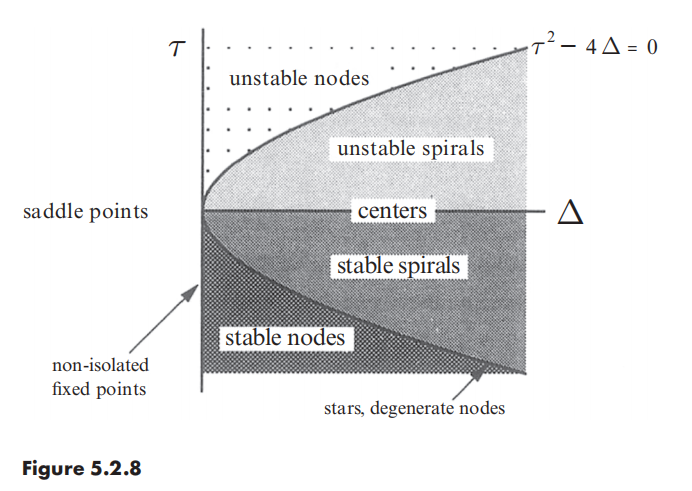

The axes are the trace $\tau$ and the determinant $\varDelta$ of the matrix $A$. 

$$
\begin{aligned}
	\lambda _{1,2}&=\frac{1}{2}\left( \tau \pm \sqrt{\tau ^2-4\varDelta} \right)\\
	\varDelta &=\lambda _1\lambda _2\\
	\tau &=\lambda _1+\lambda _2\\
\end{aligned}
$$

<font face="Times New Roman">
<style>
    p {
        text-indent: 2em;
    }
    .justify {
        text-align: justify;
        text-justify: inter-word;
    }
</style>


### Exercise 5.2.14:  A project about random systems

Suppose we pick a linear system at random; what’s the probability that the origin will be, say, an unstable spiral?  To be more specific, consider the system $\dot{x}=Ax$, where 
$A=
\left( \begin{matrix}
	a&		b\\
	c&		d\\
\end{matrix} \right) $.
Suppose we pick the entries $a, b, c, d$ independently and at random from a uniform distribution on the interval $[-1, 1]$.  Find the probabilities of all the different kinds of fixed points.

To check your answers (or if you hit an analytical roadblock), try the $Monte\ Carlo\ method$. Generate millions of random matrices on the computer and have the machine count the relative frequency of saddles, unstable spirals, etc.

Are the answers the same if you use a normal distribution instead of a uniform distribution?

In [1]:
from tqdm.notebook import tqdm
import numpy as np

# set seed for reproducibility
np.random.seed(0)

In [2]:
def get_random_matrix_by_uniform(lower_bound=-1, upper_bound=1):

    a = np.random.uniform(lower_bound, upper_bound)
    b = np.random.uniform(lower_bound, upper_bound)
    c = np.random.uniform(lower_bound, upper_bound)
    d = np.random.uniform(lower_bound, upper_bound)

    return np.array([[a, b], [c, d]])

def get_random_matrix_by_randn():

    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    d = np.random.randn()

    return np.array([[a, b], [c, d]])

In [5]:
saddlePoints = 0
unstableSpirals = 0
stableSpirals = 0
unstableNodes = 0
stableNodes = 0
nonIsolatedFixedPoints = 0
starsDegenerateNodes = 0
centers = 0

for _ in tqdm(range(1000000)):
    A = get_random_matrix_by_uniform()
    # compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    delta = eigenvalues[0] * eigenvalues[1]
    tau = eigenvalues[0] + eigenvalues[1]
    tauSquaredMinus4Delta = tau**2 - 4 * delta

    if delta < 0:
        saddlePoints += 1
        continue

    if delta == 0:
        nonIsolatedFixedPoints += 1
        if tau == 0:
            centers += 1
        continue

    # delta > 0
    if tau == 0:
        centers += 1
        continue

    # tau > 0
    if tau > 0:
        if tauSquaredMinus4Delta < 0:
            unstableSpirals += 1
        elif tauSquaredMinus4Delta > 0:
            unstableNodes += 1
        else:  # tauSquaredMinus4Delta == 0
            starsDegenerateNodes += 1
        continue

    # tau < 0
    if tau < 0:
        if tauSquaredMinus4Delta < 0:
            stableSpirals += 1
        elif tauSquaredMinus4Delta > 0:
            stableNodes += 1
        else:  # tauSquaredMinus4Delta == 0
            starsDegenerateNodes += 1
        continue

print("saddle points: ", saddlePoints / 1000000, "%")
print("unstable spirals: ", unstableSpirals / 1000000, "%")
print("stable spirals: ", stableSpirals / 1000000, "%")
print("unstable nodes: ", unstableNodes / 1000000, "%")
print("stable nodes: ", stableNodes / 1000000, "%")
print("non-isolated fixed points: ", nonIsolatedFixedPoints / 1000000, "%")
print("stars degenerate nodes: ", starsDegenerateNodes / 1000000, "%")
print("centers: ", centers / 1000000, "%")

  0%|          | 0/1000000 [00:00<?, ?it/s]

saddle points:  0.500335 %
unstable spirals:  0.159733 %
stable spirals:  0.159336 %
unstable nodes:  0.090324 %
stable nodes:  0.090272 %
non-isolated fixed points:  0.0 %
stars degenerate nodes:  0.0 %
centers:  0.0 %


In [4]:
saddlePoints = 0
unstableSpirals = 0
stableSpirals = 0
unstableNodes = 0
stableNodes = 0
nonIsolatedFixedPoints = 0
starsDegenerateNodes = 0
centers = 0

for _ in tqdm(range(1000000)):
    A = get_random_matrix_by_randn()
    # compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    delta = eigenvalues[0] * eigenvalues[1]
    tau = eigenvalues[0] + eigenvalues[1]
    tauSquaredMinus4Delta = tau**2 - 4 * delta

    if delta < 0:
        saddlePoints += 1
        continue

    if delta == 0:
        nonIsolatedFixedPoints += 1
        if tau == 0:
            centers += 1
        continue

    # delta > 0
    if tau == 0:
        centers += 1
        continue

    # tau > 0
    if tau > 0:
        if tauSquaredMinus4Delta < 0:
            unstableSpirals += 1
        elif tauSquaredMinus4Delta > 0:
            unstableNodes += 1
        else:  # tauSquaredMinus4Delta == 0
            starsDegenerateNodes += 1
        continue

    # tau < 0
    if tau < 0:
        if tauSquaredMinus4Delta < 0:
            stableSpirals += 1
        elif tauSquaredMinus4Delta > 0:
            stableNodes += 1
        else:  # tauSquaredMinus4Delta == 0
            starsDegenerateNodes += 1
        continue

print("saddle points: ", saddlePoints / 1000000, "%")
print("unstable spirals: ", unstableSpirals / 1000000, "%")
print("stable spirals: ", stableSpirals / 1000000, "%")
print("unstable nodes: ", unstableNodes / 1000000, "%")
print("stable nodes: ", stableNodes / 1000000, "%")
print("non-isolated fixed points: ", nonIsolatedFixedPoints / 1000000, "%")
print("stars degenerate nodes: ", starsDegenerateNodes / 1000000, "%")
print("centers: ", centers / 1000000, "%")

  0%|          | 0/1000000 [00:00<?, ?it/s]

saddle points:  0.500864 %
unstable spirals:  0.146744 %
stable spirals:  0.146204 %
unstable nodes:  0.103376 %
stable nodes:  0.102812 %
non-isolated fixed points:  0.0 %
stars degenerate nodes:  0.0 %
centers:  0.0 %


<font face="Times New Roman">

## Glossary
$$
\begin{array}{l}
	Saddle\,\,points&		\text{鞍点}\\
	Non-isolated\,\,fixed\,\,points&		\text{非孤立不动点}\\
	Centers&		\text{中心}\\
	Spiral&		\text{焦点}\\
	Node&		\text{结点}\\
	Stars,\,\,degenerate\,\,nodes&		\text{星形}, \text{退化结点}\\
\end{array}
$$
